<a href="https://colab.research.google.com/github/rtomek9/DS3001Group23CHDProject/blob/main/classification%26confusion_matrixes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv('/content/fhs_train.csv')

In [ ]:
#riley and cat cleaning

In [2]:
df.head()

,Unnamed: 0,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1267,1,58,1.0,0,0.0,0.0,0,0,0,220.0,143.0,104.0,29.85,75,87.0,1
1,1209,0,40,1.0,1,15.0,0.0,0,0,0,199.0,122.0,82.0,22.16,85,77.0,0
2,2050,0,52,1.0,0,0.0,0.0,0,0,0,275.0,112.0,71.0,25.68,80,NaN,0
3,1183,1,38,2.0,1,43.0,0.0,0,1,0,170.0,130.0,94.0,23.90,110,75.0,0
4,3225,0,43,1.0,0,0.0,0.0,0,0,0,202.0,124.0,92.0,21.26,75,74.0,0


In [3]:
df['cigsPerDay'] = df['cigsPerDay'].fillna(0)

In [4]:
df['BPMeds'] = df['BPMeds'].fillna(0)

In [5]:
df.describe()

,Unnamed: 0,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3180.000000,3180.000000,3180.000000,3095.000000,3180.000000,3180.000000,3180.000000,3180.000000,3180.000000,3180.000000,3141.000000,3180.000000,3180.000000,3165.000000,3180.000000,2895.000000,3180.000000
mean,2129.740881,0.433019,49.633962,1.957027,0.490881,8.902830,0.029245,0.006604,0.321069,0.026101,236.600764,132.784748,83.117767,25.888117,75.942138,81.833506,0.153145
std,1231.779357,0.495571,8.557596,1.011135,0.499995,11.993431,0.168520,0.081008,0.466961,0.159460,44.847411,22.433267,12.009212,4.130475,12.050504,23.625357,0.360184
min,1.000000,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,50.000000,15.540000,44.000000,40.000000,0.000000
25%,1062.750000,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,205.000000,117.000000,75.000000,23.100000,68.000000,71.000000,0.000000
50%,2137.500000,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,233.000000,129.000000,82.000000,25.490000,75.000000,78.000000,0.000000
75%,3209.250000,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.125000,90.000000,28.140000,83.000000,87.000000,0.000000
max,4240.000000,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,140.000000,394.000000,1.000000


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#classification?

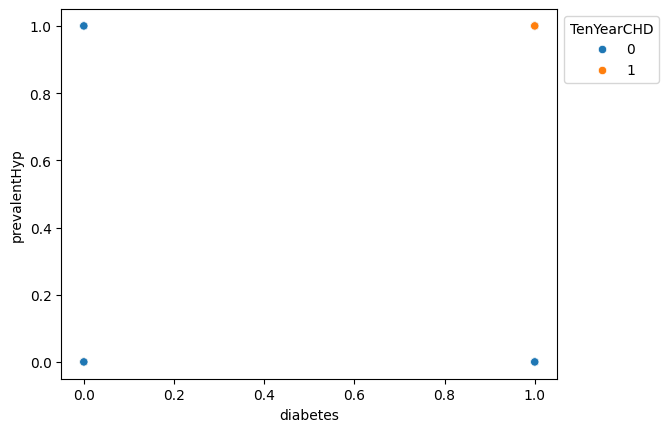

In [36]:
this_plot = sns.scatterplot(data=df,x='diabetes',y='prevalentHyp',hue='TenYearCHD')
sns.move_legend(this_plot, "upper left", bbox_to_anchor=(1, 1)) # Move legend

In [43]:
# Maxmin normalization function:
def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)

# Apply maxmin to each column of X to get U:
X = X.apply(maxmin)
print(X.head())
print(X.describe())

   diabetes  prevalentHyp
0       0.0           0.0
1       0.0           0.0
2       0.0           0.0
3       0.0           1.0
4       0.0           0.0
          diabetes  prevalentHyp
count  3180.000000   3180.000000
mean      0.026101      0.321069
std       0.159460      0.466961
min       0.000000      0.000000
25%       0.000000      0.000000
50%       0.000000      0.000000
75%       0.000000      1.000000
max       1.000000      1.000000


In [44]:

from sklearn.neighbors import KNeighborsClassifier

# Select features/target variable for analysis:
y = df['TenYearCHD']
X = df.loc[:,['diabetes','prevalentHyp']] # Create feature matrix

# Max-min normalize the features:
X = X.apply(maxmin)

# Fit the model:
model = KNeighborsClassifier(n_neighbors=3) # Create a sk model for k=3
classifier_model = model.fit(X,y) # Train the model on our data

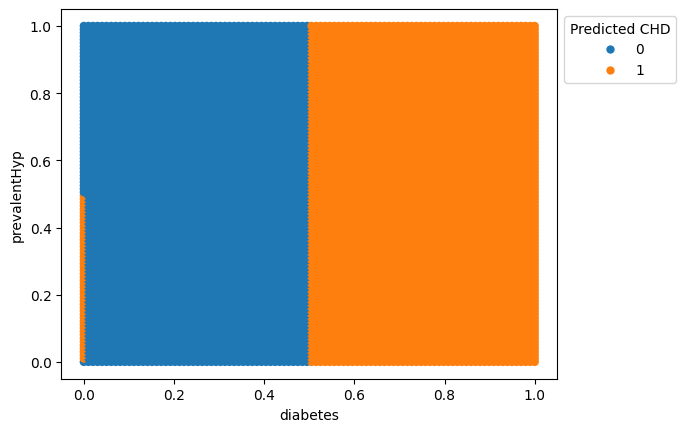

In [45]:
# Graph of predictor:
N_x = 100 # Coarseness of x variable
N_y = 100 # Coarseness of y variable
total = N_x*N_y # Total number of points to plot
grid_x = np.linspace(0,1,N_x) # Create a grid of x values
grid_y = np.linspace(0,1,N_y) # Create a grid of y values
xs, ys = np.meshgrid(grid_x,grid_y) # Explode grids to all possible pairs
X = xs.reshape(total) # Turns pairs into vectors
Y = ys.reshape(total) # Turns pairs into vectors
x_hat = pd.DataFrame({'diabetes':X,'prevalentHyp':Y}) # Create a dataframe of points to plot
y_hat = classifier_model.predict(x_hat) # Fit the model to the points
x_hat['Predicted CHD'] = y_hat # Add new variable to the dataframe
# Create seaborn plot:
this_plot = sns.scatterplot(data=x_hat,x='diabetes',y='prevalentHyp',hue='Predicted CHD', linewidth=0)
sns.move_legend(this_plot, "upper left", bbox_to_anchor=(1, 1)) # Move legend off the plot canvas

In [ ]:
#confusion matrixes

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

## Select data:
y = df['TenYearCHD'] # Target variable
X = df.loc[:,['diabetes','prevalentHyp']] # Create feature matrix
X = X.apply(maxmin) # Normalize X

In [47]:
## Split the sample:
X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.5, # Split the sample 80 train/ 20 test
                                                    random_state=200) # For replication purposes
N_train = len(y_train)
N_test = len(y_test)

In [48]:
## Solve for k that maximizes accuracy:
k_bar = 100 # Number of k's to try
Acc = np.zeros(k_bar) # We'll store the accuracy here

for k in range(k_bar):
    model = KNeighborsClassifier(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(X_train.values,y_train) # Train the model on our data
    y_hat = fitted_model.predict(X_test.values) # Predict values for test set
    Acc[k] = np.sum( y_hat == y_test )/N_test # Accuracy on testing data

Acc_max = np.max(Acc) # Find highest recorded Accuracy
max_index = np.where(Acc==Acc_max) # Find the indices that equal the maximum
k_star = max_index[0]+1 # Find the optimal value of k; why index+1?
print(k_star)

[  4   5   6  12  14  15  16  17  18  19  20  21  22  23  24  25  26  27
  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45
  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100]


In [49]:
## Fit optimal model:
model = KNeighborsClassifier(n_neighbors=k_star[0]) # Create a sk model for k
fitted_model = model.fit(X_train.values,y_train) # Train the model on our data
y_hat = fitted_model.predict(X_test.values) # Predict values for test set

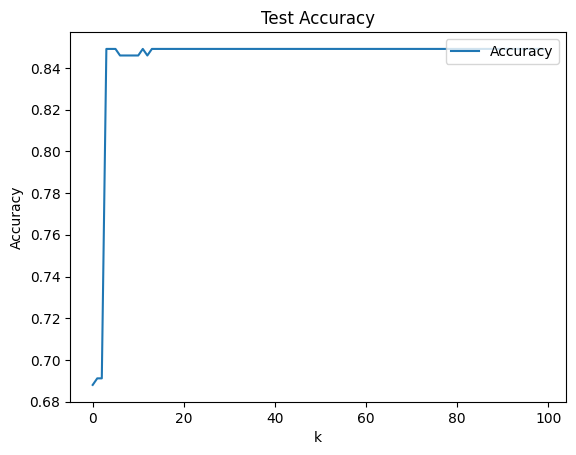

In [50]:
## Accuracy plot:
plt.plot(np.arange(0,k_bar),Acc,label='Accuracy')
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.legend(loc='upper right')
plt.title('Test Accuracy')
plt.show()

In [51]:
# Confusion matrix:
pd.crosstab(y_test,y_hat)

col_0,0
TenYearCHD,
0,1350
1,240
